За оваа лабараториска вежба го одбрав множеството со податоци на различни поќемони.Таргет колона ќе ми биде колоната "Legendary", која има 2 вредности(True и False) и во која се предвидува дали одреден покемон е легендарен или не.

Линк до податочно множество : https://www.kaggle.com/datasets/abcsds/pokemon
Кристијан Бошев 203159

In [1]:
import pandas as pd

In [4]:
dataframe = pd.read_csv("Pokemon.csv")


In [5]:
dataframe


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


проверка дали имаме missing values 

In [7]:
import math

In [8]:
dataframe.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Податоците од Legendary колоната се енкодираат со 1 доколку имаат вредност True и 0 доколку се False

In [9]:
# for i in range(799):
#     if(dataframe["Legendary"][i] == False):
#       dataframe["Legendary"][i] = 0
#     else:
#       dataframe["Legendary"][i] = 1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [10]:
dataframe['Legendary'] = le.fit_transform(dataframe["Legendary"])

Missing values во колоната Type 2 се поставуваат на 'No second type' бидејки таквите покемони немаат втор тип и подари тоа оваа колона има празни полиња

In [11]:
for i in range(799):
    if(pd.isna(dataframe["Type 2"][i])):
      dataframe["Type 2"][i] = "No Second Type"

/var/folders/18/2qvtzbvx3gj8284cbq2q0mvh0000gn/T/ipykernel_16195/2652653303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Type 2"][i] = "No Second Type"


In [12]:
dataframe.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [13]:
dataframe['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

In [14]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

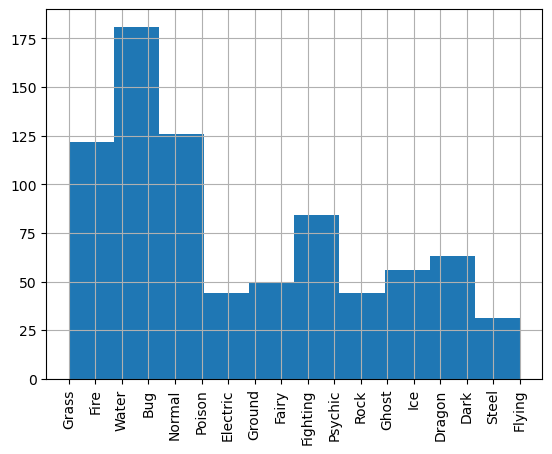

In [15]:
dataframe['Type 1'].hist()
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

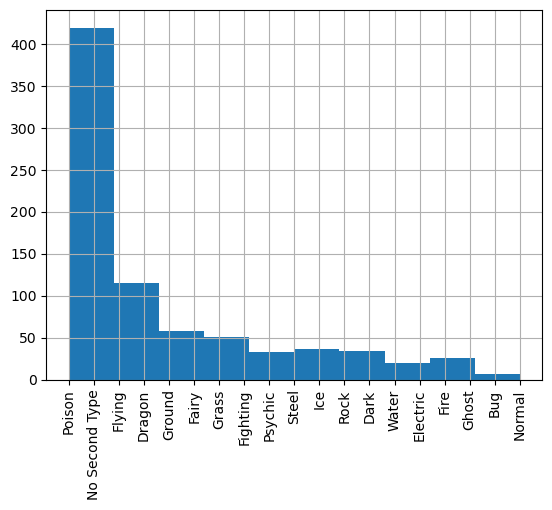

In [17]:
dataframe['Type 2'].hist()
plt.xticks(rotation=90)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

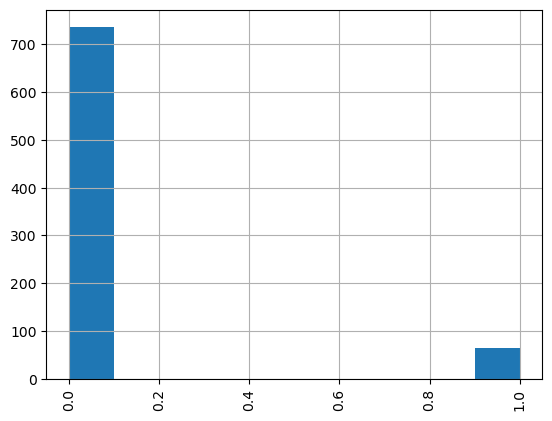

In [18]:
dataframe["Legendary"].hist()
plt.xticks(rotation=90)

In [19]:
import seaborn as sns
import numpy as np

In [20]:
dataframe.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,No Second Type,309,39,52,43,60,50,65,1,0


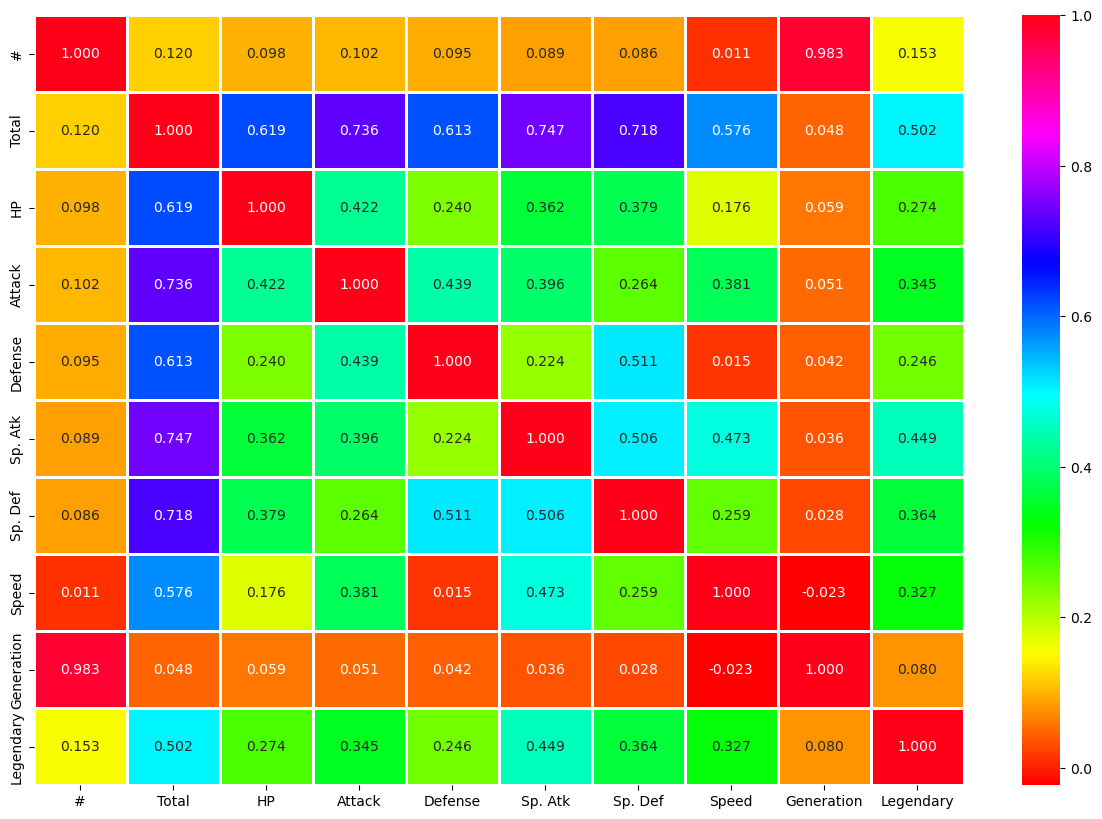

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

<AxesSubplot:xlabel='Total', ylabel='Attack'>

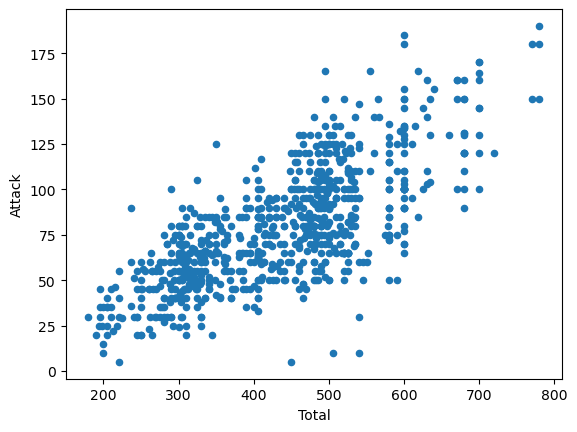

In [22]:
dataframe.plot.scatter(x="Total", y="Attack")

In [23]:
dataframe['Type 1'] = le.fit_transform(dataframe["Type 1"])
dataframe['Type 2'] = le.fit_transform(dataframe["Type 2"])
dataframe['Name'] = le.fit_transform(dataframe["Name"])

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [25]:
X = dataframe.drop(["Legendary"],axis=1)

In [26]:
X

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,80,9,14,318,45,49,49,65,65,45,1
1,2,329,9,14,405,60,62,63,80,80,60,1
2,3,745,9,14,525,80,82,83,100,100,80,1
3,3,746,9,14,625,80,100,123,122,120,80,1
4,4,102,6,12,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,160,15,4,600,50,100,150,100,150,50,6
796,719,161,15,4,700,50,160,110,160,110,110,6
797,720,314,14,8,600,80,110,60,150,130,70,6
798,720,315,14,1,680,80,160,60,170,130,80,6


In [27]:
Y=dataframe["Legendary"]

In [28]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: Legendary, Length: 800, dtype: int64

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [30]:
naive_bayes_model = GaussianNB()

In [31]:
naive_bayes_model.fit(X_train, Y_train)

GaussianNB()

In [32]:
Y_predict = naive_bayes_model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

In [34]:
accuracy = accuracy_score(Y_test,Y_predict)
r2 = r2_score(Y_test,Y_predict)
mse = mean_squared_error(Y_test,Y_predict)
mae = mean_absolute_error(Y_test,Y_predict)

In [35]:
print("Accuracy:",accuracy)
print("R2 score:",r2)
print("Mean squared error:",mse)
print("Mean absolute error:",mae)

Accuracy: 0.91875
R2 score: 0.04367816091954024
Mean squared error: 0.08125
Mean absolute error: 0.08125


Со Гаусоновиот Наивен Баесов класификатор добиваме добра точност над тестирачкото множество, но имаме лош R2_score што може да значи дека нашиот модел добро ги класифицира податоците во False колоната. Бидејки тие се во многу поголем број од оние во True колоната, добиваме и добра точност над целото множество

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [37]:
LDA = LinearDiscriminantAnalysis()

In [38]:
LDA.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [39]:
Y_predict = LDA.predict(X_test)

In [40]:
accuracy = accuracy_score(Y_test,Y_predict)
r2 = r2_score(Y_test,Y_predict)
mse = mean_squared_error(Y_test,Y_predict)
mae = mean_absolute_error(Y_test,Y_predict)

In [41]:
print("Accuracy:",accuracy)
print("R2 score:",r2)
print("Mean squared error:",mse)
print("Mean absolute error:",mae)

Accuracy: 0.95625
R2 score: 0.4850574712643678
Mean squared error: 0.04375
Mean absolute error: 0.04375


In [42]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [43]:
QDA = QuadraticDiscriminantAnalysis()

In [44]:
QDA.fit(X_train,Y_train)

/Users/kristijanboshev/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [49]:
print("Accuracy:",accuracy)
print("R2 score:",r2)
print("Mean squared error:",mse)
print("Mean absolute error:",mae)

Accuracy: 0.91875
R2 score: 0.04367816091954024
Mean squared error: 0.08125
Mean absolute error: 0.08125


In [50]:
accuracy = accuracy_score(Y_test,Y_predict)
r2 = r2_score(Y_test,Y_predict)
mse = mean_squared_error(Y_test,Y_predict)
mae = mean_absolute_error(Y_test,Y_predict)

In [51]:
print("Accuracy:",accuracy)
print("R2 score:",r2)
print("Mean squared error:",mse)
print("Mean absolute error:",mae)

Accuracy: 0.91875
R2 score: 0.04367816091954024
Mean squared error: 0.08125
Mean absolute error: 0.08125


Со LDA и Naive Bayes model добивме идентични резултати, кој што имаат поголема прецизност отколку онаа на QDA.Исто така имаме и подобар R2 score.Преку оваа анализа можеме да заклучиме дека овие модели би биле подобри за користење во овај случај.